# Machine Learning (Scikit-learn): Multi-class Classifier

In this document, the performance of 3 different Machine Learning (ML) algorithms are
compared to solve the multi-class classification problem. The following algorithms are implemented:

Algorithm 1: KNeighborsClassifier.

Algorithm 2: SVC.

Algorithm 3: GaussianNB.

In [24]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score

Dataset is imported from sklearn library, hence, the exploratory data analysis (EDA) is ommited. Dataset "digits" will be used.

In [25]:
# Load dataset
digits = load_digits()

# Print description of the dataset
#print(digits.DESCR)

Some 'images' of the dataset are shown below.

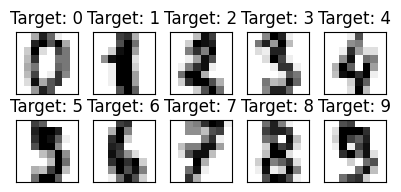

In [26]:
# Plot the first 10 images of the dataset
figure, axes = plt.subplots(nrows=2,ncols= 5, figsize=(4, 2))
for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap='gray_r')
    axes.set_title(f'Target: {target}')
    axes.set_xticks([])
    axes.set_yticks([])

# Adjust subplot parameters within a figure    
plt.tight_layout()

The dataset has 1797 "images" with 64 features (8x8 pixels).

In [27]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


Classes are balanced, this is, there are aproximatly the same number of training data for all classes.

In [28]:
# Convert to DataFrame
y = pd.DataFrame(digits.target, columns=['target'])

# Verify if classes are balanced
print(y.value_counts())

target
3         183
1         182
5         182
4         181
6         181
9         180
7         179
0         178
2         177
8         174
Name: count, dtype: int64


In [29]:
# Obtain characteristic matrix (x) and objective variable (y)
x = digits.data
y = digits.target

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size=0.2, random_state=0)

## Model creation

In [30]:
def all_metrics(y_test, y_pred, title='', average='weighted'):
    '''Function to obtain all metrics for multi-class classification models'''
    print(title)
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
    print(f'Precision: {precision_score(y_test, y_pred, average=average):.2f}')
    print(f'Recall: {recall_score(y_test, y_pred, average=average):.2f}')
    print(f'F1 Score: {f1_score(y_test, y_pred, average=average):.2f}')

In [ ]:
# Algorithm 1: KNeighborsClassifier ----------
kn_model = KNeighborsClassifier(n_neighbors=1)
# Train the model
kn_model.fit(x_train, y_train)
# Make predictions
y_pred = kn_model.predict(x_test)
# Print all metrics
all_metrics(y_test, y_pred, title='KNeighborsClassifier:')

KNeighborsClassifier:
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


In [ ]:
# Algorithm 2: SVC ---------------------------
svc_model = SVC(gamma='scale')
svc_model.fit(x_train, y_train)
y_pred = svc_model.predict(x_test)
all_metrics(y_test, y_pred, title='SVC:')

SVC:
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


In [ ]:
# Algorithm 3: GaussianNB ----------------------
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)
y_pred = gnb_model.predict(x_test)
all_metrics(y_test, y_pred, title='GaussianNB:')

GaussianNB:
Accuracy: 0.82
Precision: 0.87
Recall: 0.82
F1 Score: 0.83


**Conclusion:** 'SVC' obtained better results.